In [1]:
import pandas as pd


In [2]:
md =  pd.read_csv('German_Fraud_Credit_Dataset.csv')

In [3]:
md.head()


over_draft  credit_usage                    credit_history  \
0           '<0'             6  'critical/other existing credit'   
1     '0<=X<200'            48                   'existing paid'   
2  'no checking'            12  'critical/other existing credit'   
3           '<0'            42                   'existing paid'   
4           '<0'            24              'delayed previously'   

               purpose  current_balance Average_Credit_Balance employment  \
0             radio/tv             1169     'no known savings'      '>=7'   
1             radio/tv             5951                 '<100'   '1<=X<4'   
2            education             2096                 '<100'   '4<=X<7'   
3  furniture/equipment             7882                 '<100'   '4<=X<7'   
4            'new car'             4870                 '<100'   '1<=X<4'   

   location       personal_status other_parties  ...   property_magnitude  \
0         4         'male single'          none  ...        'real estate'   
1         2  'female div/dep/mar'          none  ...        'real estate'   
2         2         'male single'          none  ...        'real estate'   
3         2         'male single'     guarantor  ...     'life insurance'   
4         3         'male single'          none  ...  'no known property'   

  cc_age  other_payment_plans     housing existing_credits  \
0     67                 none         own                2   
1     22                 none         own                1   
2     49                 none         own                1   
3     45                 none  'for free'                1   
4     53                 none  'for free'                2   

                    job num_dependents  own_telephone foreign_worker class  
0               skilled              1            yes            yes  good  
1               skilled              1           none            yes   bad  
2  'unskilled resident'              2           none            yes  good  
3               skilled              2           none            yes  good  
4               skilled              2           none            yes   bad  

[5 rows x 21 columns]

In [4]:
md['over_draft'].unique()

array(["'<0'", "'0<=X<200'", "'no checking'", "'>=200'"], dtype=object)

In [5]:
from sklearn import preprocessing

In [6]:
label_encoder = preprocessing.LabelEncoder()

In [7]:
md['over_draft']= label_encoder.fit_transform(md['over_draft'])

In [8]:
md['over_draft'].unique()

array([1, 0, 3, 2], dtype=int64)

In [9]:
md['credit_history'].unique()

array(["'critical/other existing credit'", "'existing paid'",
       "'delayed previously'", "'no credits/all paid'", "'all paid'"],
      dtype=object)

In [10]:
md['credit_history']= label_encoder.fit_transform(md['credit_history'])

In [11]:
md.head()

over_draft  credit_usage  credit_history              purpose  \
0           1             6               1             radio/tv   
1           0            48               3             radio/tv   
2           3            12               1            education   
3           1            42               3  furniture/equipment   
4           1            24               2            'new car'   

   current_balance Average_Credit_Balance employment  location  \
0             1169     'no known savings'      '>=7'         4   
1             5951                 '<100'   '1<=X<4'         2   
2             2096                 '<100'   '4<=X<7'         2   
3             7882                 '<100'   '4<=X<7'         2   
4             4870                 '<100'   '1<=X<4'         3   

        personal_status other_parties  ...   property_magnitude cc_age  \
0         'male single'          none  ...        'real estate'     67   
1  'female div/dep/mar'          none  ...        'real estate'     22   
2         'male single'          none  ...        'real estate'     49   
3         'male single'     guarantor  ...     'life insurance'     45   
4         'male single'          none  ...  'no known property'     53   

   other_payment_plans     housing existing_credits                   job  \
0                 none         own                2               skilled   
1                 none         own                1               skilled   
2                 none         own                1  'unskilled resident'   
3                 none  'for free'                1               skilled   
4                 none  'for free'                2               skilled   

  num_dependents  own_telephone foreign_worker class  
0              1            yes            yes  good  
1              1           none            yes   bad  
2              2           none            yes  good  
3              2           none            yes  good  
4              2           none            yes   bad  

[5 rows x 21 columns]

In [12]:
md['purpose'].unique()

array(['radio/tv', 'education', 'furniture/equipment', "'new car'",
       "'used car'", 'business', "'domestic appliance'", 'repairs',
       'other', 'retraining'], dtype=object)

In [13]:
md['purpose']= label_encoder.fit_transform(md['purpose'])

In [14]:
md['purpose'].unique()

array([7, 4, 5, 1, 2, 3, 0, 8, 6, 9], dtype=int64)

In [15]:
md['Average_Credit_Balance']= label_encoder.fit_transform(md['Average_Credit_Balance'])

In [16]:
md['employment']= label_encoder.fit_transform(md['employment'])

In [17]:
md['personal_status']= label_encoder.fit_transform(md['personal_status'])

In [18]:
md['other_parties']= label_encoder.fit_transform(md['other_parties'])

In [19]:
md['property_magnitude']= label_encoder.fit_transform(md['property_magnitude'])

In [20]:
md['other_payment_plans']= label_encoder.fit_transform(md['other_payment_plans'])

In [21]:
md['housing']= label_encoder.fit_transform(md['housing'])

In [22]:
md['job']= label_encoder.fit_transform(md['job'])

In [23]:
md['own_telephone']= label_encoder.fit_transform(md['own_telephone'])

In [24]:
md['foreign_worker']= label_encoder.fit_transform(md['foreign_worker'])

In [25]:
md['class']= label_encoder.fit_transform(md['class'])

In [26]:
md.rename(columns={'class':'class_1'}, 
                 inplace=True)

In [27]:
x=md.drop(['class_1'],axis=1)
y=md['class_1']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [29]:
ctree = tree.DecisionTreeClassifier()

In [30]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.3,random_state=1)

In [31]:
ctree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
y_train_pred= ctree.predict(x_train)
print('train_accuracy=',metrics.precision_score(y_train,y_train_pred))

train_accuracy= 1.0


In [33]:
ctree.feature_importances_

array([0.16198791, 0.08440071, 0.07353094, 0.06339539, 0.12838679,
       0.05236644, 0.02353304, 0.04953785, 0.0277224 , 0.02866846,
       0.03451831, 0.04134279, 0.11749612, 0.01692572, 0.00797321,
       0.01582847, 0.02638107, 0.0108024 , 0.035202  , 0.        ])

In [34]:
feature_imp = pd.DataFrame()
feature_imp['col']=x.columns
feature_imp['imp']=ctree.feature_importances_*100
feature_imp.sort_values('imp',ascending=False)


col        imp
0               over_draft  16.198791
4          current_balance  12.838679
12                  cc_age  11.749612
1             credit_usage   8.440071
2           credit_history   7.353094
3                  purpose   6.339539
5   Average_Credit_Balance   5.236644
7                 location   4.953785
11      property_magnitude   4.134279
18           own_telephone   3.520200
10         residence_since   3.451831
9            other_parties   2.866846
8          personal_status   2.772240
16                     job   2.638107
6               employment   2.353304
13     other_payment_plans   1.692572
15        existing_credits   1.582847
17          num_dependents   1.080240
14                 housing   0.797321
19          foreign_worker   0.000000

In [35]:
x1=md.drop(['foreign_worker','housing','num_dependents','other_payment_plans','existing_credits','job','own_telephone','employment','class_1'],axis=1)
y1=md['class_1']

In [36]:
x1.head()

over_draft  credit_usage  credit_history  purpose  current_balance  \
0           1             6               1        7             1169   
1           0            48               3        7             5951   
2           3            12               1        4             2096   
3           1            42               3        5             7882   
4           1            24               2        1             4870   

   Average_Credit_Balance  location  personal_status  other_parties  \
0                       4         4                3              2   
1                       2         2                0              2   
2                       2         2                3              2   
3                       2         2                3              1   
4                       2         3                3              2   

   residence_since  property_magnitude  cc_age  
0                4                   2      67  
1                2                   2      22  
2                3                   2      49  
3                4                   0      45  
4                4                   1      53

In [37]:
y1.head()

0    1
1    0
2    1
3    1
4    0
Name: class_1, dtype: int32

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,random_state=1,test_size=.3)

In [40]:
gtree = tree.DecisionTreeClassifier()

In [41]:
gtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
y_pred=gtree.predict(x_test)

In [43]:
metrics.accuracy_score(y_pred,y_test)

0.66

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid={"criterion":['gini','entropy'],
            "max_features":[2,3,4,5,6,7,8,9,10],
            "splitter":['best','random'],
            "min_samples_leaf":[1,2,3,4,5,6,7,8,9],
            "max_depth":[1,2,3,4,5,6,7,8,9,10],
            "class_weight"      : [{0:1, 1:2}, {0:1, 1:5}]
    
}

In [46]:
opt=GridSearchCV(ctree,param_grid,scoring='accuracy',verbose=2,cv=5)

In [47]:
opt.fit(x_train,y_train)

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=1, splitte

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1:

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1:

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1:

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=9, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=9, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=9, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=9, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=9, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=9, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, cri

[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, crit

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1:

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=8, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=8, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=8, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=8, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=8, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=8, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=8, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=8, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=8, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=8, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=8, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, cr

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2

[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=g

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1:

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=g

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=g

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0:

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=g

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=g

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=g

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=g

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=g

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=g

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1:

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0:

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1:

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=5, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=5, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=5, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=5, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=5, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=5, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=5, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=5, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1:

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=6, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=6, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=6, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=6, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=6, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=6, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=6, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=6, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=g

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=9, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=9, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=9, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=9, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=9, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=9, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=9, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=9, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=g

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0:

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=g

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=g

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1:

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=g

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1:

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, crit

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=9, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=9, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=9, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=9, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=9, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=9, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=9, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=9, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=g

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1:

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=4, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=4, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=4, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=g

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=8, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=8, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=8, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=3, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=3, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=3, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=5, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=5, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=5, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=7, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=7, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=7, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=7, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=7, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=7, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=7, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=7, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=9, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=9, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=9, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=9, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=9, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=9, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=9, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=9, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=g

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0:

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0:

[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0:

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2

[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=9, splitter=random 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=8, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=8, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=8, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=8, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=8, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=8, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=8, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=8, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0:

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, c

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=6, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=1, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=9, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=7, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=2, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=9, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=7, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=9, min_samples_leaf=3, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=9, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=1, splitter=best 
[CV]  class

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=4, splitter=random

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=7, splitter=best 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=7, splitter=best 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=9, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=3, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=8, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=2, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={

[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] cla

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=4, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=7, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  class_

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=5, splitter=rand

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=9, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=7, splitter=random 
[CV]  

[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weigh

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=8, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=7, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=2, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=9, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=7, splitter=random 
[CV]  class_weight

[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] cla

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=8, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=2, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=9, splitter=best 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, splitter=random 
[C

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=7, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=8, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=5, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=9, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=7, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=1, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=5, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=2, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=8, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=6, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=9, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=9, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=9, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=9, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=9, min_samples_leaf=7, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=5, splitter=best 
[C

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=6, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=6, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=6, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=6, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=6, min_samples_leaf=5, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=6, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=7, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=4, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=5, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=2, splitter=best

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=8, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=9, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=5, min_samples_leaf=1, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=5, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=5, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=5, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=5, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=5, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=5, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=5, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=5, min_samples_leaf=7, splitter=best 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=4, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=1, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=7, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=4, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=1, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=8, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=8, splitter=rand

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=9, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=6, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=6, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=6, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=6, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=6, min_samples_leaf=6, splitter=random 
[CV]  clas

[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=3, splitter=random, total=   0.0s
[CV]

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=1, splitter=best 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=4, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=2, splitter=best 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=8, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=5, splitter=best 
[C

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=1, splitter=best 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=7, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=1, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=4, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=1, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=6, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=2, splitter=best 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=7, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=4, splitter=random 
[C

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=9, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=2, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=9, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=6, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=1, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=7, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=3, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=9, splitter=best 
[CV]  class_weight={

[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] cla

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=6, splitter=best 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=2, splitter=rand

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=8, splitter=rand

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=6, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, splitter=random 
[C

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=7, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, splitter=rand

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=5, splitter=best 
[CV]  class_

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=2, splitter=best 
[CV]  class_

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=8, splitter=random

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=8, min_samples_leaf=6, splitter=best 
[C

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=2, splitter=rand

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=8, splitter=random

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=5, splitter=random

[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, 

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=g

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=4, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=g

[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, crit

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=6, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=7, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1:

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1:

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=9, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=9, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=9, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=9, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=1, max_features=10, min_samples_leaf=4, splitter=random 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1:

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=g

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=4, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, 

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=8, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=8, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=8, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=8, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=8, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=8, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=8, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=8, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=g

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=9, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=10, min_samples_leaf=7, splitter=random 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, crit

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=8, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=9, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5

[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=2, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, crit

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=4, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=7, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=9, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=10, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0:

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=2, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=5, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=g

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, 

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=7, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=8, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=9, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1:

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, cri

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5

[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gi

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=3, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, 

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1:

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=6, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=7, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=g

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=9, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=9, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=9, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=9, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=9, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=9, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=9, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=9, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=6, max_features=10, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=3, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1:

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=7, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=8, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=9, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=9, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=9, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=9, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=9, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=9, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=9, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=9, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=7, max_features=10, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=2, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=3, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=4, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=4, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=4, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=4, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=4, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=4, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=4, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=4, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=g

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=6, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=7, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=8, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=8, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=8, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=8, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=8, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=8, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=8, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=8, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=9, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1:

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=8, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=2, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=g

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1:

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=g

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=5, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=7, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=7, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=7, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=7, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=7, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=7, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=7, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=7, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=g

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=8, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=9, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=9, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=9, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=9, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=9, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=9, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=9, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=9, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=9, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=9, max_features=10, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=2, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0:

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, cri

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, cri

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=5, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=6, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, c

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=7, min_samples_leaf=8, splitter=random 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, cri

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=9, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=10, max_features=10, min_samples_leaf=6, splitter=best 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=1, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=3, min_samples_leaf=7, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=1, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=6, min_samples_leaf=7, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=4, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=7, min_samples_leaf=9, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=8, min_samples_leaf=9, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=9, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=9, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=9, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=9, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=9, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=9, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=9, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=9, min_samples_leaf=4, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=1, max_features=10, min_samples_leaf=8, splitter=rand

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=3, min_samples_leaf=6, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_leaf=7, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=5, min_samples_leaf=9, splitter=best 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=6, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=6, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=4, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_leaf=8, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=5, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=8, min_samples_leaf=9, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=3, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=9, min_samples_leaf=7, splitter=best 
[CV]  class_weight

[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=1, splitter=random, total=   0.0s
[CV]

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=6, splitter=random 
[CV]  clas

[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_w

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=2, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_leaf=8, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=7, min_samples_leaf=6, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=8, min_samples_leaf=4, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=2, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=9, min_samples_leaf=8, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=6, splitter=best

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=2, min_samples_leaf=7, splitter=best 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=3, min_samples_leaf=4, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  

[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weigh

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=6, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=1, splitter=best 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=7, min_samples_leaf=7, splitter=best 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=3, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=8, min_samples_leaf=8, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=9, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=9, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=9, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=9, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=9, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=9, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=9, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=9, min_samples_leaf=5, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=2, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=10, min_samples_leaf=7, splitter=rand

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  

[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weigh

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=4, min_samples_leaf=4, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=5, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=9, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=6, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=6, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=6, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=6, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=6, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=6, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=6, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=6, min_samples_leaf=7, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=7, min_samples_leaf=4, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=8, min_samples_leaf=8, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=9, min_samples_leaf=8, splitter=best 
[CV]  class_weight={

[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] cla

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=1, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=4, min_samples_leaf=7, splitter=best 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=1, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=1, splitter=random 
[CV]  clas

[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=6, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=7, min_samples_leaf=5, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=2, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=8, min_samples_leaf=8, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=2, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=9, min_samples_leaf=9, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=6, max_features=10, min_samples_leaf=6, splitter=best 
[C

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=4, min_samples_leaf=4, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=6, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=6, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=6, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=6, min_samples_leaf=5, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=3, splitter=best 
[CV]  class_we

[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=7, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] cla

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=8, min_samples_leaf=6, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=3, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=9, min_samples_leaf=9, splitter=best 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=4, splitter=random 
[C

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=7, max_features=10, min_samples_leaf=9, splitter=best 
[CV]  class_

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=7, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=7, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=3, min_samples_leaf=7, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  class_weight={

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=4, min_samples_leaf=8, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=5, min_samples_leaf=5, splitter=best 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=2, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=6, min_samples_leaf=5, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=2, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=7, min_samples_leaf=8, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=3, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=9, min_samples_leaf=9, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=8, max_features=10, min_samples_leaf=5, splitter=random 
[C

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=2, min_samples_leaf=9, splitter=random 
[CV]

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=3, min_samples_leaf=7, splitter=random 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=4, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=3, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=7, min_samples_leaf=9, splitter=best 
[CV]  class_weight

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=8, min_samples_leaf=6, splitter=best 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=3, splitter=best 
[CV]  class_we

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=9, min_samples_leaf=9, splitter=best 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=9, max_features=10, min_samples_leaf=5, splitter=random 
[C

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=2, splitter=rand

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=9, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=9, splitter=random 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=3, splitter=rand

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=1, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=6, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=6, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=6, splitter=rand

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=9, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=9, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=9, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=6, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=6, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=6, splitter=best 
[C

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=3, splitter=best 
[CV]  

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=8, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=8, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=7, min_samples_leaf=8, splitter=random 
[C

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=8, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=8, min_samples_leaf=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=8, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=8, min_samples_leaf=5, splitter=random

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=2, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=2, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=2, splitter=random 
[C

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=7, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=7, splitter=best, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=9, min_samples_leaf=7, splitter=random 
[CV]  clas

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=4, split

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=8, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=8, splitter=random, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=10, max_features=10, min_samples_leaf=9, split

[Parallel(n_jobs=1)]: Done 32400 out of 32400 | elapsed:  3.3min finished
C:\Users\ajay\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 5}],
                         'criterion': ['gini', 'entropy'],
      

In [48]:
opt.best_params_


{'class_weight': {0: 1, 1: 2},
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 6,
 'min_samples_leaf': 7,
 'splitter': 'best'}

In [49]:
opt.best_score_

0.7457142857142857

In [50]:
finalmodel=opt.best_estimator_
y_test_pred=finalmodel.predict(x_test)

In [51]:
print('accuracy=',metrics.accuracy_score(y_test,y_test_pred))

accuracy= 0.72


In [52]:
print('accuracy=',metrics.recall_score(y_test,y_test_pred))

accuracy= 0.9158878504672897


In [53]:
print('accuracy=',metrics.precision_score(y_test,y_test_pred))

accuracy= 0.7480916030534351


In [54]:
y_pred_prob =finalmodel.predict_proba(x_test)

In [55]:
pay_likely_hood=y_pred_prob[:,1]*100

In [56]:
comp_df = x_test.copy()
comp_df['actual'] = y_test
comp_df['predicted'] = y_test_pred
comp_df['propensity'] = pay_likely_hood
 
comp_df.head()

over_draft  credit_usage  credit_history  purpose  current_balance  \
507           0            15               0        1             6850   
818           1            36               3        6            15857   
452           3            12               4        5             2759   
368           1            36               3        5             3446   
242           1            48               4        2             4605   

     Average_Credit_Balance  location  personal_status  other_parties  \
507                       0         1                3              2   
818                       2         2                1              0   
452                       2         2                3              2   
368                       2         4                3              2   
242                       2         3                3              2   

     residence_since  property_magnitude  cc_age  actual  predicted  \
507                2                   0      34       0          1   
818                3                   3      43       1          0   
452                4                   0      34       1          1   
368                2                   3      42       0          0   
242                4                   1      24       0          0   

     propensity  
507   94.915254  
818    0.000000  
452   83.333333  
368   43.902439  
242    0.000000

In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [58]:
fpr, tpr, thresholds = roc_curve(y_test,pay_likely_hood)

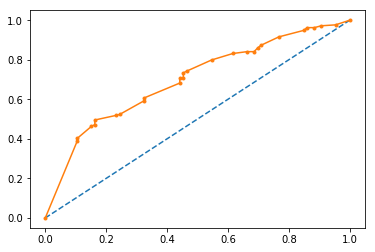

In [59]:
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [60]:
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.6977830906324712

In [61]:
import pickle
pickle.dump(finalmodel, open('german_Bank_defaultloan_Pred_ajay27_07.pk', 'wb'))

In [67]:
import sys
index_counter = 1
user_dict = {}
for column in x.columns:
  #temp_val = int(input("Enter"+column+":"))
  temp_val = sys.argv[index_counter]
  index_counter=index_counter + 1
  user_dict[column] = temp_val
user_input = pd.DataFrame(data=user_dict,index=[0])
diabetic=finalmodel.predict(user_input)
print(diabetic[0])

IndexError: list index out of range